In [ ]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
#reading the data
df = pd.read_csv('insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#separating categorical and numerical columns
cat_cols = df.columns[df.dtypes == 'object']
num_cols = df.columns[df.dtypes != 'object']

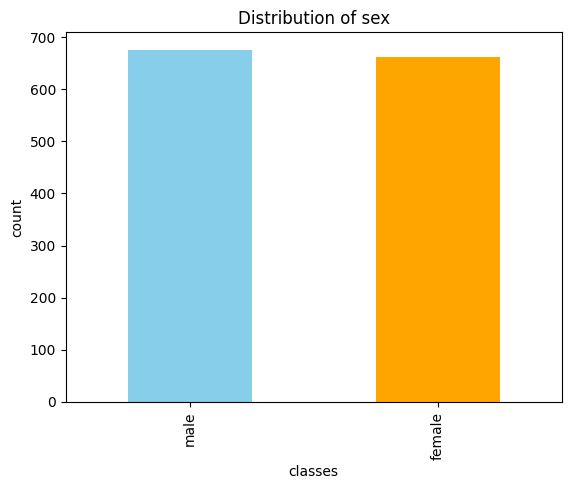

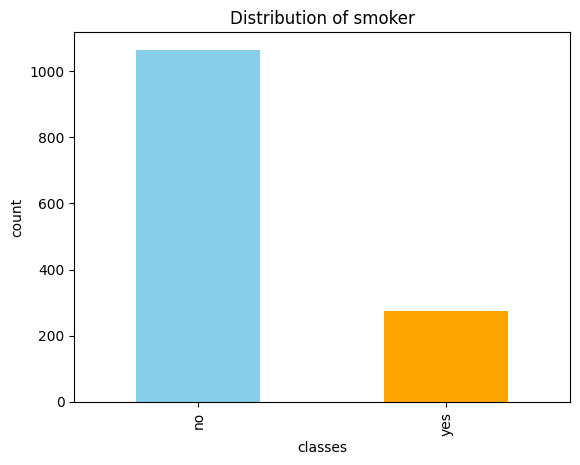

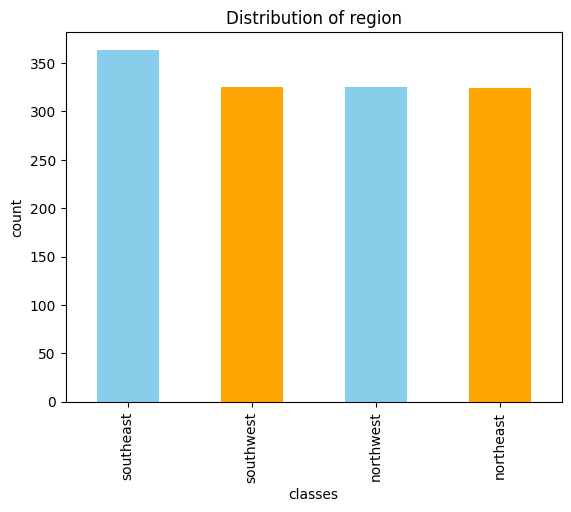

In [ ]:
# Visualize the distribution of Categorical Variables
for i in cat_cols:
        df[i].value_counts().plot(kind='bar', color=['skyblue', 'orange'])

        plt.title(f'Distribution of {i}')
        plt.xlabel('classes')
        plt.ylabel('count')
        plt.show()

In [ ]:
# Encoding Categorical Variables
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
print(df.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


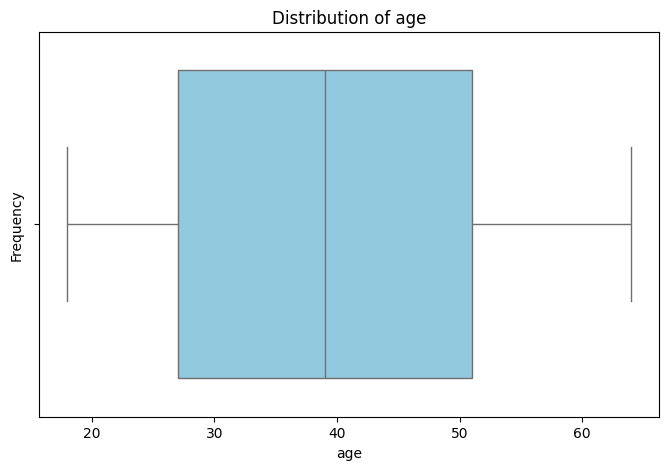

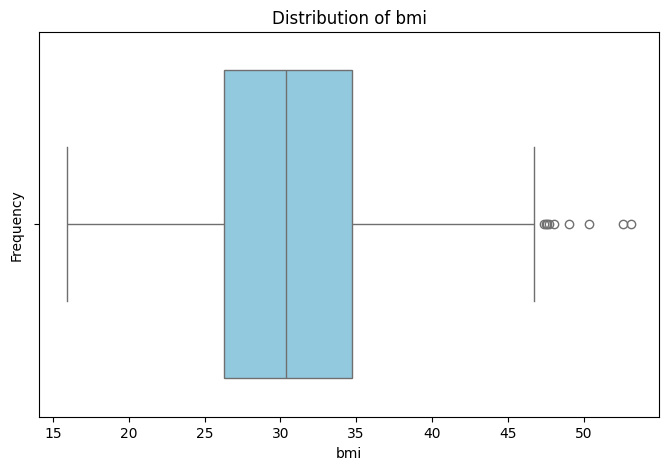

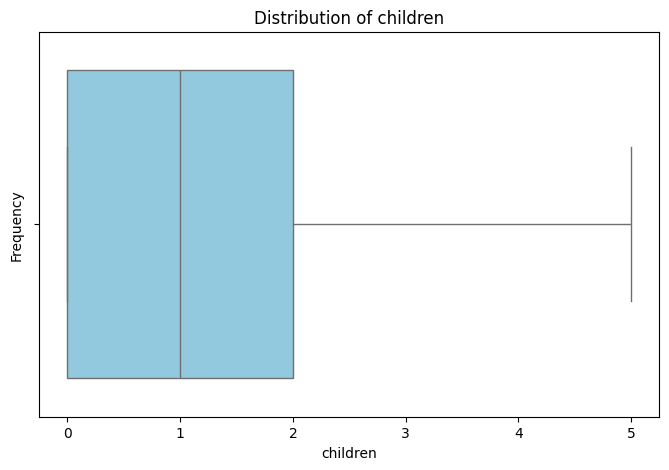

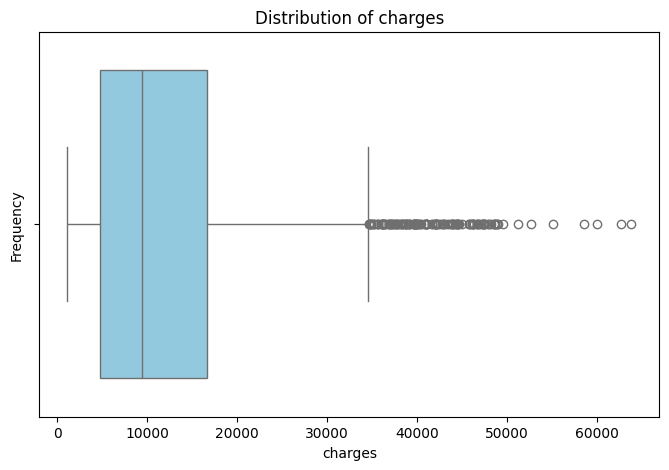

In [ ]:
# Visualize the distribution of Numerical Variables befor Outlier Handeling
for j in num_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[j], color='skyblue')
        plt.title(f'Distribution of {j}')
        plt.xlabel(j)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
# Handling Outliers in Numerical Columns
def replace_outliers_with_bounds(df, col):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  
    
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])  
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])  


for col in num_cols:
    replace_outliers_with_bounds(df, col)


print(df.head())

    age  sex     bmi  children  smoker  region      charges
0  19.0    0  27.900       0.0       1       3  16884.92400
1  18.0    1  33.770       1.0       0       2   1725.55230
2  28.0    1  33.000       3.0       0       2   4449.46200
3  33.0    1  22.705       0.0       0       1  21984.47061
4  32.0    1  28.880       0.0       0       1   3866.85520


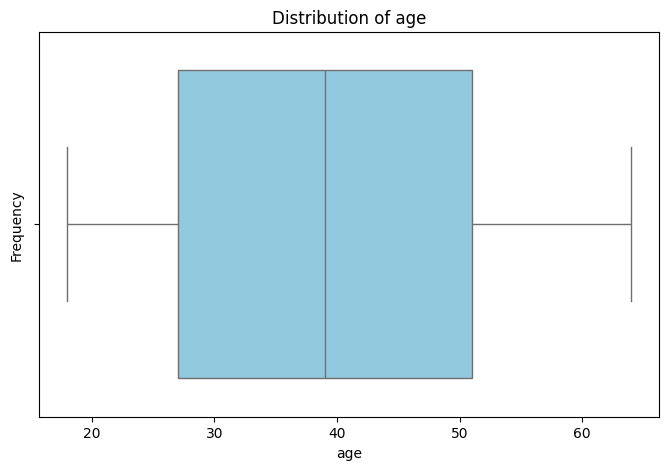

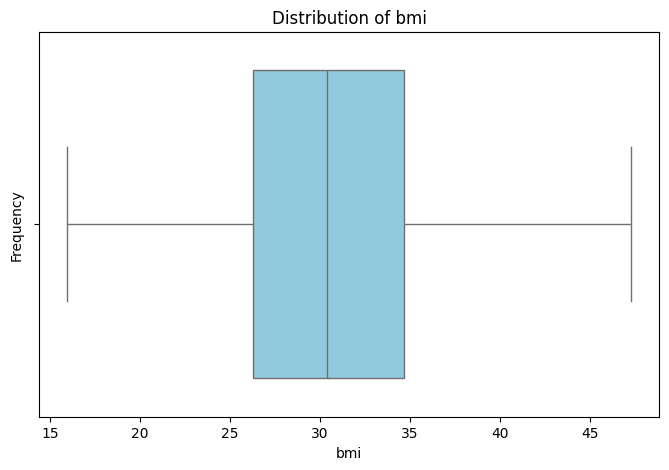

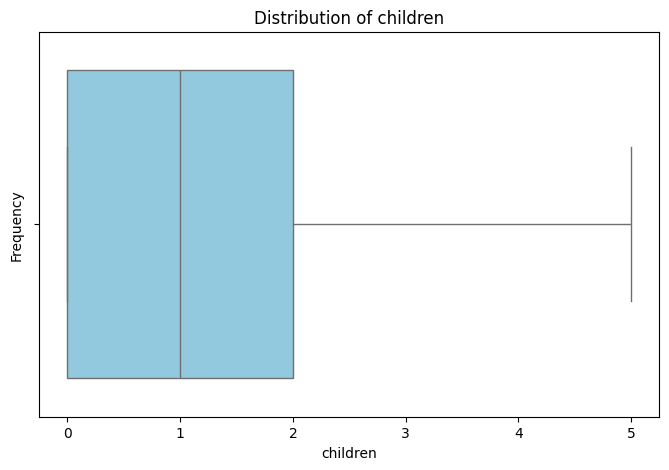

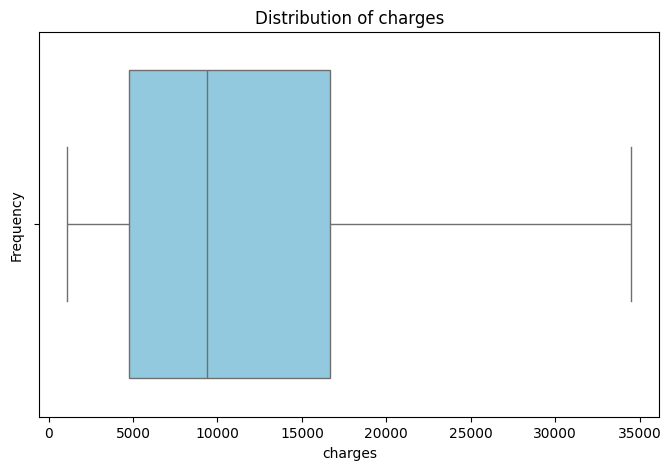

In [ ]:
# Visualize the distribution of Numerical Variables after Outlier Handeling
for j in num_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[j], color='skyblue')
        plt.title(f'Distribution of {j}')
        plt.xlabel(j)
        plt.ylabel('Frequency')
        plt.show()

In [26]:
y = df['charges']
X = df.drop('charges', axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#CatBoost Regressor
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)
model.fit(X_train, y_train)
y_pred_cat = model.predict(X_test)

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

# XGBoost Regressor
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)

# LightGBM Regressor
model = LGBMRegressor(Verbose = 0)
model.fit(X_train, y_train)
y_pred_lgbm = model.predict(X_test)

# K-Nearest Neighbors Regressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)

# AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_ada = model.predict(X_test)



In [32]:
print('CatBoost R2:', r2_score(y_test, y_pred_cat))
print('CatBoost MSE:', mean_squared_error(y_test, y_pred_cat))
print('----------------------------')
print('Random Forest R2 Score:', r2_score(y_test, y_pred_rf))
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_rf))
print('----------------------------')
print('XGBoost R2 Score:', r2_score(y_test, y_pred_xgb))
print('XGBoost MSE:', mean_squared_error(y_test, y_pred_xgb))
print('----------------------------')
print('LightGBM R2 Score:', r2_score(y_test, y_pred_lgbm))
print('LightGBM MSE:', mean_squared_error(y_test, y_pred_lgbm))
print('----------------------------')
print('K-Nearest Neighbors R2 Score:', r2_score(y_test, y_pred_knn))
print('K-Nearest Neighbors MSE:', mean_squared_error(y_test, y_pred_knn))
print('----------------------------')
print('AdaBoost R2 Score:', r2_score(y_test, y_pred_ada))
print('AdaBoost MSE:', mean_squared_error(y_test, y_pred_ada))

CatBoost R2: 0.8148257046969118
CatBoost MSE: 20101876.267505217
----------------------------
Random Forest R2 Score: 0.8357069940203684
Random Forest MSE: 17835076.25836215
----------------------------
XGBoost R2 Score: 0.7968970893195135
XGBoost MSE: 22048144.281509336
----------------------------
LightGBM R2 Score: 0.8258324604779576
LightGBM MSE: 18907021.21240655
----------------------------
K-Nearest Neighbors R2 Score: 0.19105114210940144
K-Nearest Neighbors MSE: 87816669.27064732
----------------------------
AdaBoost R2 Score: 0.7789759052554934
AdaBoost MSE: 23993605.57802714


In [35]:
models = ['CatBoost', 'Random Forest', 'XGBoost', 'LightGBM', 'K-Nearest Neighbors','AdaBoost']
r2_scores = [r2_score(y_test, y_pred_cat)*100, r2_score(y_test, y_pred_rf)*100,
                r2_score(y_test, y_pred_xgb)*100, r2_score(y_test, y_pred_lgbm)*100,
                r2_score(y_test, y_pred_knn)*100, r2_score(y_test, y_pred_ada)*100]

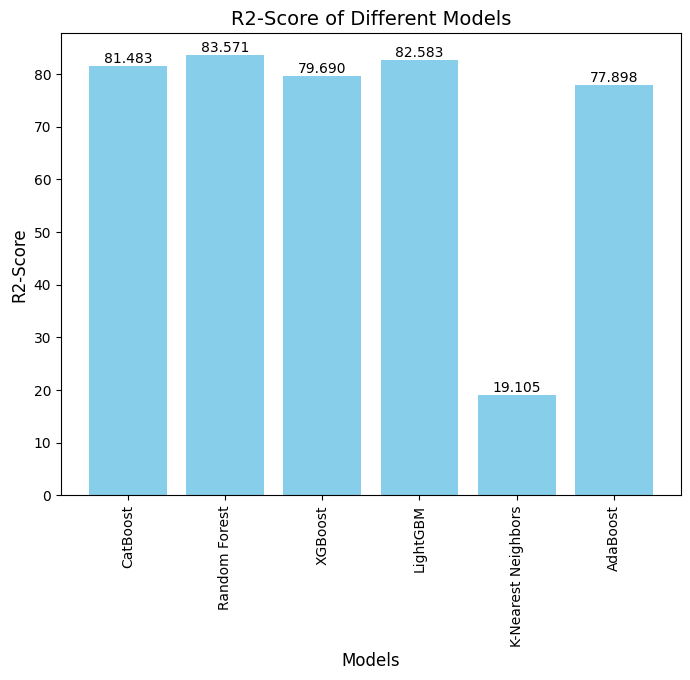

In [36]:
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color='skyblue')


plt.title('R2-Score of Different Models', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('R2-Score', fontsize=12)


for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', va='bottom', fontsize=10)


plt.xticks(rotation=90)


plt.show()